# BIX Tecnologia] Teste de Excel


Na planilha há quatro abas:

--> Dados de venda
- ID: identificador único de uma venda
- ProductID: identificador único de um produto
- ClientID: identificador único de um cliente
- Discount: desconto aplicado em uma venda
- UnitPrice: preço unitário de um produto vendido
- Quantity: quantidade de produto vendido em uma venda
- StoreID: identificador único de uma loja
- Date: data de uma venda

--> Dados de consumidores
- ID: identificador único de um consumidor
- City: cidade/localidade onde um consumidor fez a compra
- State: Unidade Federativa onde um consumidor fez a compra
- DateOfBirth: data de nascimento de um consumidor
- Sex: sexo de um consumidor

--> Dados de lojas
- ID: identificador único de uma loja
- Name: cidade/localidade de uma loja
- State: Unidade Federativa de uma loja

--> Dados de produto
- ID: identificador único de um produto
- Name: nome de um produto
- Size: tamanho de um produto


1. Qual das respostas abaixo descreve a melhor maneira de organizar as etapas em um projeto com estes dados? 


+ [X] Validar dados com área de negócio, Análise Exploratória de Dados (EDA), Separação do conjunto de dados, pré processamento e transformações, Modelo inicial (baseline), validação preliminar área de negócio, Tunagem do modelo, construção do pipeline, subir modelo para produção.
+ Análise Exploratória de Dados (EDA), pré processamento e transformações, construção de pipeline, Validar dados com área de negócio, Modelo inicial (baseline), validação preliminar área de negócio, Tunagem do modelo, subir modelo para produção.
+ Validar dados com área de negócio, Modelo inicial (baseline), pré processamento e transformações, Análise Exploratória de Dados (EDA), validação preliminar área de negócio, Tunagem do modelo, construção do pipeline, subir modelo para produção.
+ Validar dados com área de negócio, construção do pipeline, Análise Exploratória de Dados (EDA), Modelo inicial (baseline), subir modelo para produção, validação preliminar área de negócio, Tunagem do modelo.

2. Com base nos dados da planilha anexada, qual tipo de modelo você escolheria para prever o valor total que será vendido por uma loja no próximo mês? 


Modelos não supervisionados.
Modelos de aprendizado por reforço.
Modelos de classificação.
Modelos de forecasting.

3. Se dois dos produtos na base de dados tem forte correlação positiva entre seus comportamento de vendas, qual gráfico abaixo melhor representaria essa relação?

C pois é asencente

4. Com base nos dados da planilha anexada, você deseja criar um algoritmo para prever a probabilidade de um cliente comprar um produto. Como você faria a divisão dos dados nas etapas de treinamento? Nota: Por validação entende-se o conjunto usado para ajustar hiper-parâmetros, e por teste entende-se o conjunto de dados não visto em treino nem em validação. 


50% treino e 50% validação
60% treino, 20% validação e 20 % teste
30% treino, 60% validação e 10% teste
10% treino, 60% validação e 30 % teste

Letra B

In [1]:
! jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
! jt -t chesterish

In [4]:
import pixiedust

AttributeError: module 'jinja2.ext' has no attribute 'with_'

In [3]:
df = pixiedust.sampleData(7)
display(df)

NameError: name 'pixiedust' is not defined

In [2]:
%%pixie_debugger
import random
def find_max (values):
    max = 0
    for val in values:
        if val > max:
            max = val
    return max
find_max(random.sample(range(100), 10))

UsageError: Cell magic `%%pixie_debugger` not found.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Configs
pd.options.display.float_format = '{:,.4f}'.format
sns.set(style="whitegrid")
plt.style.use('seaborn')
seed = 42
np.random.seed(seed)
random.seed(seed)
# https://mljar.com/blog/feature-importance-in-random-forest/
# !pip install openpyxl

In [4]:
filepath = 'Base de Dados - Questionário.xlsx'

In [5]:
# carrega normal
df_produto = pd.read_excel(filepath, sheet_name='Sheet2')
df_consumidor = pd.read_excel(filepath, sheet_name='Sheet3')
df_loja = pd.read_excel(filepath, sheet_name='Sheet4')

In [6]:
df_venda = pd.read_excel(filepath, sheet_name='Sheet1', header=4)
df_venda = df_venda.drop(axis='columns', columns=['Unnamed: 1','Unnamed: 0'])
df_venda.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,"14,001.0000",0.0800,249.2000,1.0000,4.0000,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,"14,001.0000",0.1000,162.4000,1.0000,4.0000,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,"14,001.0000",0.1000,194.6000,1.0000,4.0000,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,"14,002.0000",0.1000,201.6000,2.0000,1.0000,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,"14,002.0000",0.1000,406.0000,1.0000,1.0000,2019-01-21


In [7]:
df1 = pd.merge(df_venda, df_produto, left_on='ProductID', right_on='ID', how='outer')
df2 = pd.merge(df1, df_consumidor, left_on='ClientID', right_on='ID', how='outer') 
df  = pd.merge(df2, df_loja, left_on='StoreID', right_on='ID', how='outer') 
len(df)

32753

In [8]:
df = df.rename(columns={"ID_x": "VendaID", "State_x": "State_Client", "State_y": "State_Store", "Name_x": "Name_Product", "Name_y": "Name_State"})
df = df.drop(axis='columns', columns=['ID_y'])
df.head()

,VendaID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name_Product,Size,VendaID,City,State_Client,DateOfBirth,Sex,Name_State,State_Store
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,"14,001.0000",0.0800,249.2000,1.0000,4.0000,2018-12-10,Tempestade,G,"14,001.0000",Curitiba,PR,1985-06-28,Homem,Curitiba,PR
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,"14,001.0000",0.1000,162.4000,1.0000,4.0000,2019-04-25,Thanos,G,"14,001.0000",Curitiba,PR,1985-06-28,Homem,Curitiba,PR
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,"14,001.0000",0.1000,194.6000,1.0000,4.0000,2019-07-17,Capitão América,P,"14,001.0000",Curitiba,PR,1985-06-28,Homem,Curitiba,PR
3,c330b70c5e60bf56e90ebe09e045f79e,002552c0663708129c0019cc97552d7d3,"14,116.0000",0.0800,249.2000,1.0000,4.0000,2018-12-03,Tempestade,G,"14,116.0000",Curitiba,PR,1987-10-21,Homem,Curitiba,PR
4,961b75f90f3f09b0b5b5526073ec83e7,002959d7a0b0990fe2d69988affcbc803,"14,116.0000",0.1000,261.8000,2.0000,4.0000,2019-05-07,Ciclope,G,"14,116.0000",Curitiba,PR,1987-10-21,Homem,Curitiba,PR


In [9]:
df.head()

,VendaID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name_Product,Size,VendaID,City,State_Client,DateOfBirth,Sex,Name_State,State_Store
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,"14,001.0000",0.0800,249.2000,1.0000,4.0000,2018-12-10,Tempestade,G,"14,001.0000",Curitiba,PR,1985-06-28,Homem,Curitiba,PR
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,"14,001.0000",0.1000,162.4000,1.0000,4.0000,2019-04-25,Thanos,G,"14,001.0000",Curitiba,PR,1985-06-28,Homem,Curitiba,PR
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,"14,001.0000",0.1000,194.6000,1.0000,4.0000,2019-07-17,Capitão América,P,"14,001.0000",Curitiba,PR,1985-06-28,Homem,Curitiba,PR
3,c330b70c5e60bf56e90ebe09e045f79e,002552c0663708129c0019cc97552d7d3,"14,116.0000",0.0800,249.2000,1.0000,4.0000,2018-12-03,Tempestade,G,"14,116.0000",Curitiba,PR,1987-10-21,Homem,Curitiba,PR
4,961b75f90f3f09b0b5b5526073ec83e7,002959d7a0b0990fe2d69988affcbc803,"14,116.0000",0.1000,261.8000,2.0000,4.0000,2019-05-07,Ciclope,G,"14,116.0000",Curitiba,PR,1987-10-21,Homem,Curitiba,PR


5. Quantos produtos únicos foram vendidos?

73

In [11]:
%%debug 
len(df['ProductID'].value_counts())

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(2)<module>()

ipdb> c


6. Qual o produto mais vendido e quantos desse produto foram vendidos?

966, Bazinga, G

In [17]:
df['ProductID'].value_counts()

002ec297b1b00fb9dde7ee6ac24b67713    966
002d4ea7c04739c130bb74d7e7cd16943    963
001c5d71ac6ad696d22315953758fa043    944
0011c512eb256aa0dbbb544d8dffcf6e3    940
0030026a6ddb3b2d1d4bc225b4b4c4da3    939
                                    ... 
00088930e925c41fd95ebfe695fd26552    205
00210e41887c2a8ef9f791ebc780cc362    204
002ec297b1b00fb9dde7ee6ac24b67711    202
002552c0663708129c0019cc97552d7d2    200
001b237c0e9bb435f2e54071129237e92    197
Name: ProductID, Length: 73, dtype: int64

In [19]:
df[ df['ProductID'] == '002ec297b1b00fb9dde7ee6ac24b67713'].head(1)[['Name_Product', 'Size']]

,Name_Product,Size
5,Bazinga,G


7. Considerando o ano de 2019, qual gráfico abaixo mais se parece à quantidade mensal do vendida do produto "Iron Man, G" ?

D



In [20]:
cod_id = '002d4ea7c04739c130bb74d7e7cd16943'

In [21]:
df_ironman = df[ df['ProductID'] == cod_id]

In [22]:
df_ironman

,VendaID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name_Product,Size,VendaID,City,State_Client,DateOfBirth,Sex,Name_State,State_Store
51,6f118f6a730ce35b230974f295f743f9,002d4ea7c04739c130bb74d7e7cd16943,"15,478.0000",0.0800,210.0000,1.0000,4.0000,2019-08-22,Iron Man,G,"15,478.0000",Curitiba,PR,1962-12-30,Homem,Curitiba,PR
89,d80faf302bbccea1f0b613d440de4d33,002d4ea7c04739c130bb74d7e7cd16943,"16,576.0000",0.1000,210.0000,1.0000,4.0000,2018-04-21,Iron Man,G,"16,576.0000",Curitiba,PR,1974-07-05,Homem,Curitiba,PR
102,c239944e346dc1fde937d68eaaf858ac,002d4ea7c04739c130bb74d7e7cd16943,"17,273.0000",0.1000,210.0000,1.0000,4.0000,2018-05-21,Iron Man,G,"17,273.0000",Curitiba,PR,1987-06-26,Homem,Curitiba,PR
122,e2384e27d52c798743c71c9f2c57763a,002d4ea7c04739c130bb74d7e7cd16943,"17,640.0000",0.0800,210.0000,2.0000,4.0000,2018-08-06,Iron Man,G,"17,640.0000",Curitiba,PR,1999-09-17,Homem,Curitiba,PR
123,cc91a8e555c5d0b61066e4be9483fa57,002d4ea7c04739c130bb74d7e7cd16943,"17,640.0000",0.1000,210.0000,1.0000,4.0000,2020-01-02,Iron Man,G,"17,640.0000",Curitiba,PR,1999-09-17,Homem,Curitiba,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32624,ae134de5629ae433d7a526ffb396750a,002d4ea7c04739c130bb74d7e7cd16943,"14,527.0000",0.1000,210.0000,1.0000,22.0000,2019-07-26,Iron Man,G,"14,527.0000",Belo Horizonte,BH,1975-11-29,Homem,Online,na
32626,1f40c568147d792b8ff628f54803a6f2,002d4ea7c04739c130bb74d7e7cd16943,"20,330.0000",0.1000,210.0000,1.0000,22.0000,2018-07-04,Iron Man,G,"20,330.0000",Belo Horizonte,BH,1957-10-19,Homem,Online,na
32627,4208d8402138f772f9c189a1859e1f55,002d4ea7c04739c130bb74d7e7cd16943,"27,047.0000",0.1000,210.0000,1.0000,22.0000,2018-09-09,Iron Man,G,"27,047.0000",Macaiba,RN,1970-05-01,Homem,Online,na
32629,fa4dc5d499f35cf8ea22c543c6a36c10,002d4ea7c04739c130bb74d7e7cd16943,"27,139.0000",0.1000,210.0000,1.0000,22.0000,2018-05-04,Iron Man,G,"27,139.0000",Belo Horizonte,BH,1975-07-27,Homem,Online,na


In [36]:
import datetime
df_ironman['Month'] = df_ironman['Date'].map(
    lambda x: x.month
)
df_ironman['Year'] = df_ironman['Date'].map(
    lambda x: x.year
)
df_ironman.head(1)

,VendaID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name_Product,Size,VendaID,City,State_Client,DateOfBirth,Sex,Name_State,State_Store,Month,Year
51,6f118f6a730ce35b230974f295f743f9,002d4ea7c04739c130bb74d7e7cd16943,"15,478.0000",0.0800,210.0000,1.0000,4.0000,2019-08-22,Iron Man,G,"15,478.0000",Curitiba,PR,1962-12-30,Homem,Curitiba,PR,8,2019


In [37]:
len(df_ironman)

963

In [38]:
df_ironman = df_ironman[ df_ironman['Year'] == 2019]
len(df_ironman)

419

<AxesSubplot:xlabel='Month'>

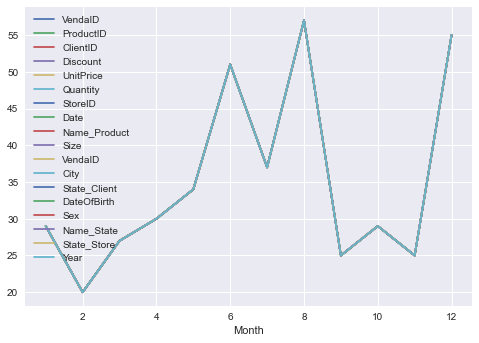

In [41]:
df_ironman.groupby('Month').count().plot()

8. Considerando a receita líquida mensal de vendas em 2019. Quais os valores de: média, mediana e desvio padrão desses valores? 

+ [X] R\$ 324.240,93 // R\$ 285.989,90 // R\$ 105.678,21

+ R\$ 294.265,10 // R\$ 257.390,91 // R\$ 99.304,56

+ R\$ 581.154,28 // R\$ 567.938,91 // R\$ 201.374,01

+ R\$ 309.649,20 // R\$ 273.622,30 // R\$ 99.616,64

In [42]:
df['Month'] = df['Date'].map(
    lambda x: x.month
)
df['Year'] = df['Date'].map(
    lambda x: x.year
)

In [43]:
df_2019 = df[ df['Year'] == 2019]

In [46]:
df_2019['Total'] = df_2019['Quantity'] * df_2019['UnitPrice']
df_2019.head()

,VendaID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name_Product,Size,VendaID,City,State_Client,DateOfBirth,Sex,Name_State,State_Store,Month,Year,Total
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,"14,001.0000",0.1000,162.4000,1.0000,4.0000,2019-04-25,Thanos,G,"14,001.0000",Curitiba,PR,1985-06-28,Homem,Curitiba,PR,4,2019,162.4000
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,"14,001.0000",0.1000,194.6000,1.0000,4.0000,2019-07-17,Capitão América,P,"14,001.0000",Curitiba,PR,1985-06-28,Homem,Curitiba,PR,7,2019,194.6000
4,961b75f90f3f09b0b5b5526073ec83e7,002959d7a0b0990fe2d69988affcbc803,"14,116.0000",0.1000,261.8000,2.0000,4.0000,2019-05-07,Ciclope,G,"14,116.0000",Curitiba,PR,1987-10-21,Homem,Curitiba,PR,5,2019,523.6000
10,7e4f454abfc163899a6ef5b4d5facfb2,0030026a6ddb3b2d1d4bc225b4b4c4da3,"14,148.0000",0.1000,233.8000,1.0000,4.0000,2019-11-29,League Legends,G,"14,148.0000",Curitiba,PR,1961-09-19,Homem,Curitiba,PR,11,2019,233.8000
11,45ee8ea280c9b83f9ca39f76dfe23919,002552c0663708129c0019cc97552d7d3,"14,166.0000",0.1000,249.2000,1.0000,4.0000,2019-02-21,Tempestade,G,"14,166.0000",Curitiba,PR,1972-07-22,Homem,Curitiba,PR,2,2019,249.2000


In [58]:
df_2019.groupby('Month').sum()['Total'].mean()

324240.9333333333

In [59]:
df_2019.groupby('Month').sum()['Total'].median()

285989.9

In [61]:
df_2019.groupby('Month').sum()['Total'].std()

105678.2097981099

9. Ainda considerando os dados de receita líquida de vendas em 2019, seu time deve focar esforços em uma das lojas para criar análises mais profundas e a primeira versão do modelo preditivo. Qual destas lojas você escolheria para prosseguir com o projeto? (1 ponto)

+ [x] Florianópolis
+ Online
+ Rio de Janeiro
+ Curitiba

In [63]:
df_2019['Name_State'].value_counts()

Florianópolis     3750
Rio de Janeiro    3048
Porto Alegre      2814
Curitiba          2304
São Paulo         1602
Belo Horizonte     823
Online             427
Name: Name_State, dtype: int64

10. Suponha que após realizar todas as etapas necessárias, seu time chegou em alguns modelos de forecasting para o volume mensal de vendas. Foram conduzidos alguns experimentos e os resultados de diferentes valores de erro percentual médio (MAPE) são apresentados abaixo. Dos resultados abaixo, qual o mais razoável que você escolheria para colocar o modelo em produção no ambiente do cliente? 


+ 45%
+ 10%
+ 0%
+ [x] 0,008%

Ter o MAPE 0% seria prever perfeitamente

-----

MAPE
O erro médio absoluto percentual (MAPE) expressa precisão como uma porcentagem do erro. Como o MAPE é uma porcentagem, pode ser mais fácil de entender do que as outras estatísticas de medida de precisão. Por exemplo, se o MAPE é 5, em média, a previsão está incorreta em 5%.

No entanto, às vezes é possível observar um valor grande de MAPE mesmo que o modelo pareça ajustar bem os dados. Examine o gráfico para ver se todos os valores de dados estão próximos de 0. Como MAPE divide o erro absoluto pelos dados reais, valores próximos de 0 podem inflar em muito o MAPE.

Interpretação
Use para comparar os ajustes de diferentes modelos de séries temporais. Valores menores indicam um ajuste melhor. Se um único modelo não tem os valores mais baixos para todas as 3 medidas de precisão, em geral, o MAPE é a medida preferida.

In [13]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel


AttributeError: module 'jinja2.ext' has no attribute 'with_'

In [14]:
%%pixie_debugger
import random
def find_max (values):
    max = 0
    for val in values:
        if val > max:
            max = val
    return max
find_max(random.sample(range(100), 10))

UsageError: Cell magic `%%pixie_debugger` not found.


In [6]:
df_loja.head()

,ID,Name,State
0,1.0000,Florianópolis,SC
1,2.0000,Rio de Janeiro,RJ
2,3.0000,Porto Alegre,RS
3,4.0000,Curitiba,PR
4,7.0000,São Paulo,SP
